In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('/content/preprocessing.csv')

df.head()

,Rent day,Time,month,temp,rain,windspeed,humidity,snow,total count
0,2020-07-01,0,july,18.9,0.0,3.0,87,0.0,26.0
1,2020-07-01,1,july,18.8,0.0,3.0,87,0.0,9.0
2,2020-07-01,2,july,18.7,0.0,3.0,87,0.0,7.0
3,2020-07-01,3,july,18.4,0.0,2.3,86,0.0,7.0
4,2020-07-01,4,july,18.2,0.0,1.2,86,0.0,4.0


In [153]:
df_temp = df[['rain','windspeed']]

df_temp

,rain,windspeed
0,0.0,3.0
1,0.0,3.0
2,0.0,3.0
3,0.0,2.3
4,0.0,1.2
...,...,...
7651,0.0,2.1
7652,0.0,2.3
7653,0.0,2.2
7654,0.0,2.1


In [154]:
df_y = df['total count']

df_y = df_y.astype('int')

df_y

0        26
1         9
2         7
3         7
4         4
       ... 
7651    168
7652     84
7653     79
7654     72
7655     39
Name: total count, Length: 7656, dtype: int64

In [155]:
x_train, x_test, y_train, y_test = train_test_split(df_temp,df_y, test_size=0.3, random_state=20)

len(x_train),len(x_test)

(5359, 2297)

In [156]:
model = KNeighborsClassifier(n_neighbors=20)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [157]:
#confusion_matrix
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[24, 14,  5, ...,  0,  0,  0],
       [19, 18,  6, ...,  0,  0,  0],
       [13, 15,  7, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [158]:
#report
report = classification_report(y_test,y_pred)
report

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.06      0.36      0.11        67\n           1       0.05      0.23      0.09        78\n           2       0.02      0.11      0.04        64\n           3       0.04      0.06      0.05        63\n           4       0.03      0.12      0.04        56\n           5       0.03      0.04      0.03        51\n           6       0.03      0.02      0.02        54\n           7       0.01      0.03      0.02        33\n           8       0.01      0.03      0.02        38\n           9       0.00      0.00      0.00        38\n          10       0.00      0.00      0.00        22\n          11       0.00      0.00      0.00        19\n          12       0.00      0.00      0.00        31\n          13       0.00      0.00      0.00        33\n          14       0.02      0.04      0.02        24\n          15       0.01      0.04      0.02        26\n          16       0.00      0.00      0.00        19\n       

In [159]:
#accuracy
print('accuracy: {:.2f}'.format(model.score(x_test,y_test)))

accuracy: 0.03


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

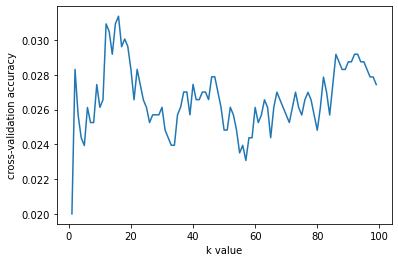

In [95]:
#k값 찾기
from sklearn.model_selection import cross_val_score

k_range = range(1,100)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(k)
  scores = cross_val_score(knn, x_test,y_test, cv=10, scoring ="accuracy")
  k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('k value')
plt.ylabel('cross-validation accuracy')
plt.show()